In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
import pandas as pd

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country', 'income'
]
df = pd.read_csv(url, header=None, names=column_names, na_values=' ?', delimiter=', ')


In [2]:
df

,,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 32561 entries, (39, 'State-gov') to (52, 'Self-emp-inc')
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  object
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  int64 
 9   sex             32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  native-country  32561 non-null  object
 12  income          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.3+ MB


In [5]:
df.describe()

,age,fnlwgt,race,sex,hours-per-week
count,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [21]:
# Fill missing values
df.fillna(method='ffill', inplace=True)

# Convert categorical variables to numerical values using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Display cleaned data info
print(df_encoded.info())


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 32561 entries, (39, 'State-gov') to (52, 'Self-emp-inc')
Data columns (total 92 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        32561 non-null  int64
 1   fnlwgt                                     32561 non-null  int64
 2   race                                       32561 non-null  int64
 3   sex                                        32561 non-null  int64
 4   hours-per-week                             32561 non-null  int64
 5   workclass_11th                             32561 non-null  bool 
 6   workclass_12th                             32561 non-null  bool 
 7   workclass_1st-4th                          32561 non-null  bool 
 8   workclass_5th-6th                          32561 non-null  bool 
 9   workclass_7th-8th                          32561 non-null  bool 
 10  workclass_9th  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df_encoded, x='income_>50K')
plt.title('Income Distribution')
plt.xlabel('Income > 50K')
plt.ylabel('Count')
plt.show()

# Visualize age distribution based on income
plt.figure(figsize=(10, 6))
sns.histplot(data=df_encoded, x='age', hue='income_>50K', multiple='stack', bins=30)
plt.title('Age Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualize hours-per-week distribution based on income
plt.figure(figsize=(10, 6))
sns.histplot(data=df_encoded, x='hours-per-week', hue='income_>50K', multiple='stack', bins=30)
plt.title('Hours-per-Week Distribution by Income')
plt.xlabel('Hours-per-Week')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df_encoded.drop(columns='income_>50K')
y = df_encoded['income_>50K']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
scaler

StandardScaler()

In [11]:
X_train_scaled

array([[-1.26129178, -0.42321894, -0.14634899, ...,  0.34537657,
        -0.04873273, -0.02295164],
       [ 0.51064242, -0.03537743,  0.92974178, ...,  0.34537657,
        -0.04873273, -0.02295164],
       [-1.26184086, -0.03537743, -0.14634899, ...,  0.34537657,
        -0.04873273, -0.02295164],
       ...,
       [ 0.25175037, -1.19890196, -0.14634899, ...,  0.34537657,
        -0.04873273, -0.02295164],
       [-1.28210955, -0.42321894, -0.14634899, ...,  0.34537657,
        -0.04873273, -0.02295164],
       [-0.58733178,  1.12814709, -0.14634899, ...,  0.34537657,
        -0.04873273, -0.02295164]])

In [12]:
X_test_scaled

array([[-0.27940104, -0.03537743, -0.14634899, ...,  0.34537657,
        -0.04873273, -0.02295164],
       [-1.31708038, -0.42321894, -0.14634899, ...,  0.34537657,
        -0.04873273, -0.02295164],
       [-0.03581701,  1.12814709, -0.14634899, ...,  0.34537657,
        -0.04873273, -0.02295164],
       ...,
       [ 2.3911812 , -0.42321894, -0.14634899, ...,  0.34537657,
        -0.04873273, -0.02295164],
       [-0.10733964, -0.03537743, -0.14634899, ...,  0.34537657,
        -0.04873273, -0.02295164],
       [ 0.0795659 ,  1.12814709,  0.92974178, ...,  0.34537657,
        -0.04873273, -0.02295164]])

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predict and evaluate
lr_y_pred = lr_model.predict(X_test_scaled)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_y_pred))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_y_pred))


Logistic Regression Confusion Matrix:
[[6927  528]
 [ 960 1354]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.93      0.90      7455
        True       0.72      0.59      0.65      2314

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.77      9769
weighted avg       0.84      0.85      0.84      9769



In [14]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict and evaluate
dt_y_pred = dt_model.predict(X_test_scaled)
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_y_pred))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))


Decision Tree Confusion Matrix:
[[6467  988]
 [ 903 1411]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.87      0.87      7455
        True       0.59      0.61      0.60      2314

    accuracy                           0.81      9769
   macro avg       0.73      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
rf_y_pred = rf_model.predict(X_test_scaled)
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))


Random Forest Confusion Matrix:
[[6732  723]
 [ 919 1395]]

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.90      0.89      7455
        True       0.66      0.60      0.63      2314

    accuracy                           0.83      9769
   macro avg       0.77      0.75      0.76      9769
weighted avg       0.83      0.83      0.83      9769



In [17]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Predict and evaluate
svm_y_pred = svm_model.predict(X_test_scaled)
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_y_pred))
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_y_pred))


SVM Confusion Matrix:
[[7040  415]
 [1112 1202]]

SVM Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.94      0.90      7455
        True       0.74      0.52      0.61      2314

    accuracy                           0.84      9769
   macro avg       0.80      0.73      0.76      9769
weighted avg       0.84      0.84      0.83      9769



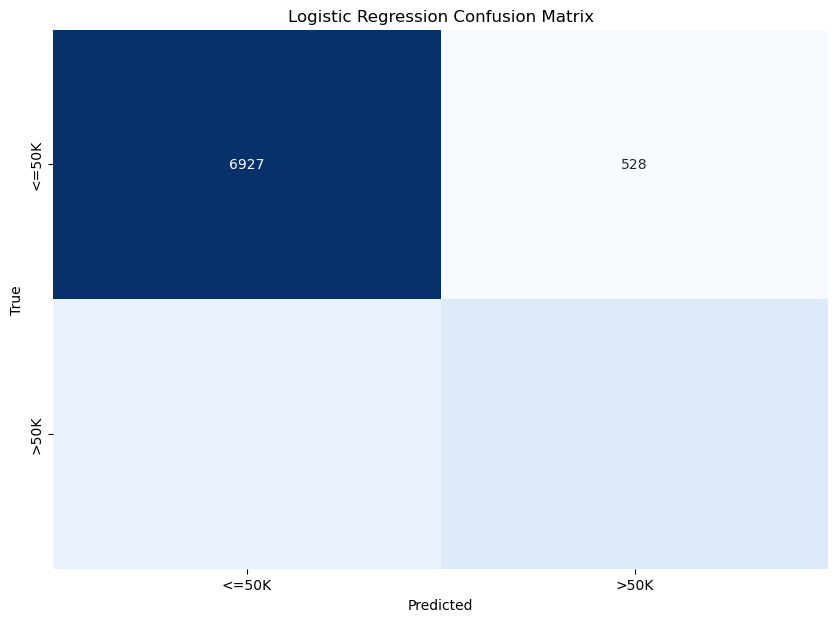

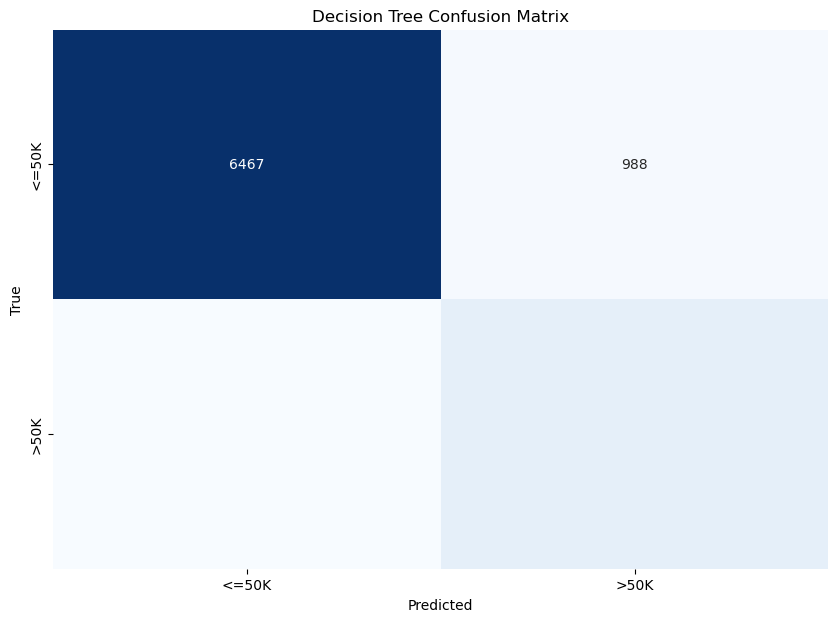

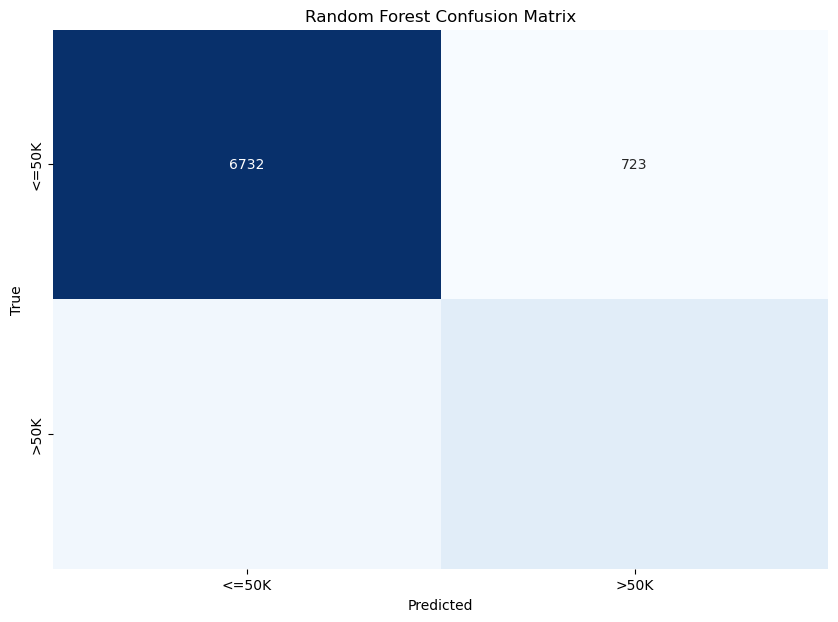

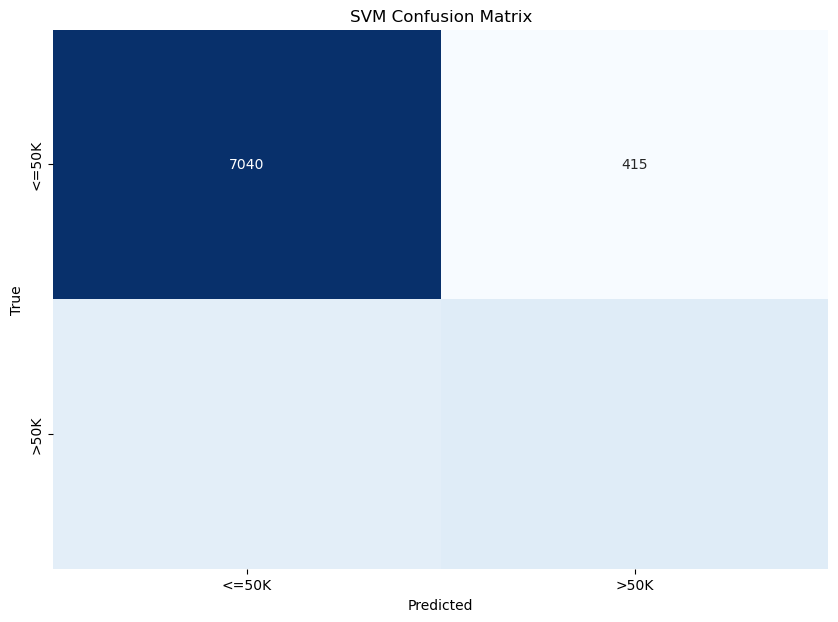

In [18]:
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(confusion_matrix(y_test, lr_y_pred), title='Logistic Regression Confusion Matrix')
plot_confusion_matrix(confusion_matrix(y_test, dt_y_pred), title='Decision Tree Confusion Matrix')
plot_confusion_matrix(confusion_matrix(y_test, rf_y_pred), title='Random Forest Confusion Matrix')
plot_confusion_matrix(confusion_matrix(y_test, svm_y_pred), title='SVM Confusion Matrix')
